In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Set plot default figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import xarray as xr
import morticia.sensor.electro as electro
# This notebook is also used for development/testing of the electro module, so auto reload the electro module if it changes
%load_ext autoreload
%aimport morticia.sensor.electro
%autoreload 1

In [2]:
# Show a conversion of absolute spectral response to spectral quantum efficiency
asr = xr.DataArray([0.1, 0.3, 0.25, 0.1], [('wvl', [0.5, 0.6, 0.7, 0.8], {'units': 'um'})], 
                     attrs={'units': 'A/W'},
                     name='asr')

In [3]:
# Here is how the xr.DataArray is printed
# Note that you only see the units of the primary (absolute spectral response) data and 
# not the units of the wavelength axis
print asr

<xarray.DataArray 'asr' (wvl: 4)>
array([ 0.1 ,  0.3 ,  0.25,  0.1 ])
Coordinates:
  * wvl      (wvl) float64 0.5 0.6 0.7 0.8
Attributes:
    units: A/W


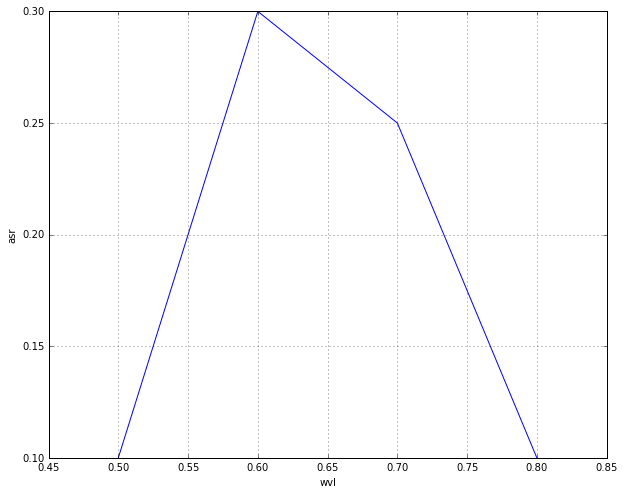

In [4]:
# Easy to plot (but axis names and units are not very illuminating)
asr.plot()
plt.grid()

In [5]:
# Unit attribute can be fetched like this (but NOT set - setting requires e.g. asr.attrs['units'] = 'km')
print asr.units,'  and  ', asr['wvl'].units


A/W   and   um


In [6]:
# Convert to spectral quantum efficiency (SQE)
sqe = electro.xd_asr2sqe(asr)

In [7]:
# Print out the DataArray 
print sqe
print '---------------------------------'
print sqe['wvl']

<xarray.DataArray (wvl: 4)>
array([ 0.24796838,  0.61992095,  0.44280068,  0.15498024])
Coordinates:
  * wvl      (wvl) float64 500.0 600.0 700.0 800.0
Attributes:
    units: 
    long_name: Spectral Quantum Efficiency
---------------------------------
<xarray.DataArray 'wvl' (wvl: 4)>
array([ 500.,  600.,  700.,  800.])
Coordinates:
  * wvl      (wvl) float64 500.0 600.0 700.0 800.0
Attributes:
    units: nm
    long_name: Wavelength


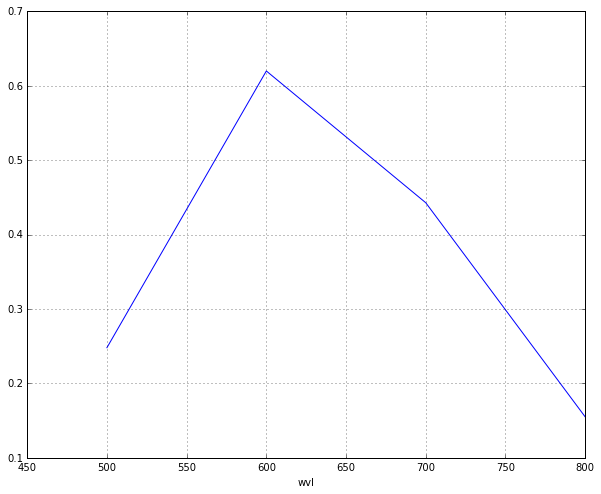

In [8]:
# Plot the spectral quantum efficiency
sqe.plot()
plt.grid()

In [9]:
# Read ASR data for the Hamamatsu S2281-04 detector
HamaS2281asrData = np.genfromtxt('data/fpa/HamamatsuS2281-04asr.csv', delimiter=',')


In [10]:
# Create a DataArray using the data read from the file
HamaS2281asr = xr.DataArray(HamaS2281asrData[:,1], [('wvl', HamaS2281asrData[:,0], {'units': 'nm'})],
                             name='asr',
                             attrs={'units': 'A/W'})

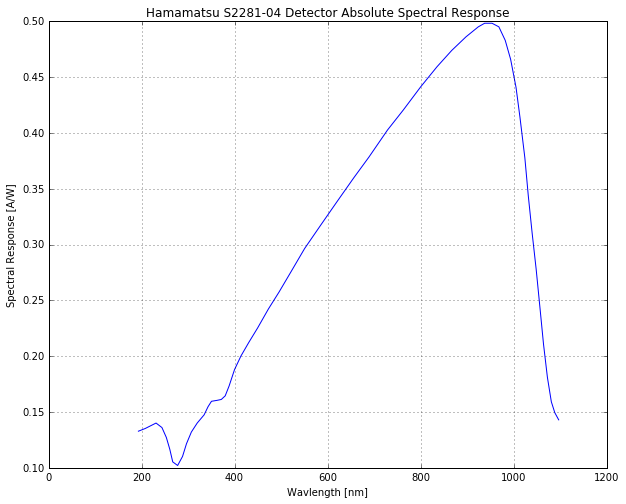

In [11]:
# Plot absolute spectral response of the Hamamatsu S2281-04 Detector
HamaS2281asr.plot()
plt.title('Hamamatsu S2281-04 Detector Absolute Spectral Response')
plt.xlabel('Wavlength [' + HamaS2281asr['wvl'].units + ']')
plt.ylabel('Spectral Response [' + HamaS2281asr.units + ']')
plt.grid()

In [12]:
# Convert to quantum efficiency
HamaS2281sqe = electro.xd_asr2sqe(HamaS2281asr)

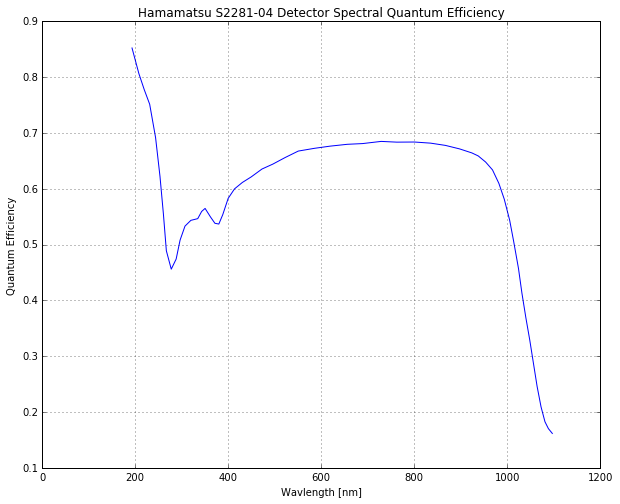

In [13]:
# PLot SQE
HamaS2281sqe.plot()
plt.title('Hamamatsu S2281-04 Detector Spectral Quantum Efficiency')
plt.xlabel('Wavlength [' + HamaS2281sqe['wvl'].units + ']')
plt.ylabel('Quantum Efficiency')
plt.grid()

In [14]:
# Show the xr.DataArray
HamaS2281sqe

<xarray.DataArray (wvl: 56)>
array([ 0.8523597 ,  0.80635996,  0.77749808,  0.75153361,  0.69196015,
        0.62245062,  0.5547703 ,  0.48899451,  0.45596669,  0.47414431,
        0.5080692 ,  0.53314151,  0.54346119,  0.54651026,  0.55942642,
        0.56484432,  0.54953138,  0.53820564,  0.53683613,  0.55362499,
        0.58277065,  0.59988157,  0.61137199,  0.62131291,  0.63544646,
        0.64420807,  0.65592819,  0.66761703,  0.67254831,  0.6764569 ,
        0.67974561,  0.68103169,  0.68493868,  0.68361506,  0.68382671,
        0.68180083,  0.6777847 ,  0.67148756,  0.66429565,  0.65887436,
        0.64795379,  0.63393629,  0.60976066,  0.58143207,  0.54377081,
        0.50656866,  0.45725236,  0.41311306,  0.36922686,  0.32891938,
        0.28450631,  0.24575089,  0.20919764,  0.18250005,  0.17019992,
        0.16157465])
Coordinates:
  * wvl      (wvl) float64 193.2 207.9 219.5 231.1 243.8 253.3 260.7 267.0 ...
Attributes:
    units: 
    long_name: Spectral Quantum Efficiency

In [15]:
# Convert the SQE and ASR to individual xr.Dataset objects
HamaS2281asrDataset = HamaS2281asr.to_dataset(name='Hamamatsu S2281-04 ASR')
HamaS2281asrDataset.attrs['title'] = 'Hamamatsu S2281-04 Detector Absolute Spectral Response'
HamaS2281sqeDataset = HamaS2281sqe.to_dataset(name='Hamamatsu S2281-04 SQE')
HamaS2281sqeDataset.attrs['title'] = 'Hamamatsu S2281-04 Detector Spectral Quantum Efficiency'

In [16]:
# Write the data in netCDF format
HamaS2281asrDataset.to_netcdf('data/fpa/HamamatsuS2281-04asr.nc')
HamaS2281sqeDataset.to_netcdf('data/fpa/HamamatsuS2281-04sqe.nc')

In [17]:
# Convert back to ASR to check
HamaS2281asrBack = electro.xd_sqe2asr(HamaS2281sqe)

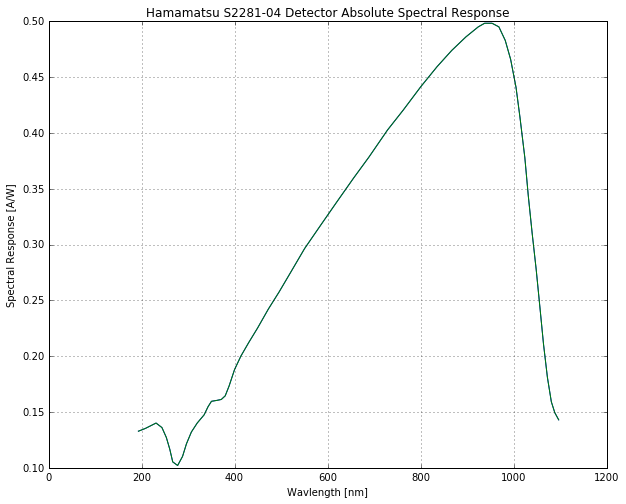

In [18]:
# Plot old and new on top of each other
plt.figure()
plt.plot(HamaS2281asrBack['wvl'], HamaS2281asrBack, HamaS2281asr['wvl'], HamaS2281asr)
plt.title('Hamamatsu S2281-04 Detector Absolute Spectral Response')
plt.xlabel('Wavlength [' + HamaS2281asr['wvl'].units + ']')
plt.ylabel('Spectral Response [' + HamaS2281asr.units + ']')
plt.grid()

# Focal Plane Arrays

Here is an example of creating a electro.FocalPlaneArray object.
Use the Kodak KAI11002 as an example

In [19]:
# Create a CCD Focal Plane Array model for the Kodak KAI11002 sensor
# First read the spectral quantum efficiency data
KodakKA11002_SQE = np.genfromtxt('./data/fpa/KodakKAI11002_SQE.csv', delimiter=',', skip_header=1)
# Convert to a DataArray
KodakKA11002_SQE = xr.DataArray(KodakKA11002_SQE[:,1], [('wvl', KodakKA11002_SQE[:,0], {'units': 'um'})], 
                                  name='sqe', attrs={'units':''})

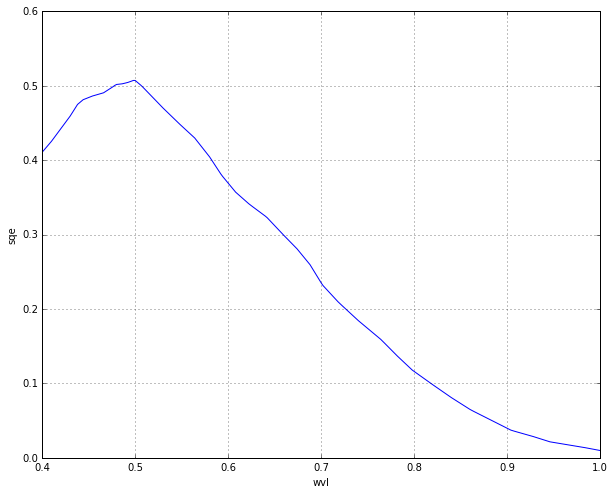

In [20]:
# Plot the SQE
KodakKA11002_SQE.plot()
plt.grid()

In [21]:
# Instantiate the FocalPlaneArray object
CCD = electro.FocalPlaneArray(pitch=[9.0, 9.0, 'um'], aperture=[9.0, 'um'], pixels=[4008, 2672], wellcapacity=[60000.0, 'e'], 
                              readnoise=[32.0, 'e'], darkcurrent=[3846.0, 'e/s'], dsnu=[3.0, '%'], prnu=[2.0, '%'],
                              sqe=KodakKA11002_SQE, darkcurrent_delta_t=[7.0, 'delta_degC'], t_ref=[40.0, 'degC'],
                              temperature=[25.0, 'degC'])
# Print the dark current value at operating temperature of 25.0 deg C
print CCD.darkcurrent, ' at CCD ', CCD.temperature

Pixel Dark Current : 870.85330319 e/s  at CCD  Temperature : 25.0 degC


In [22]:
CCD.nyquist_x

Nyquist Frequency in x : 55.5555555556 1/mm

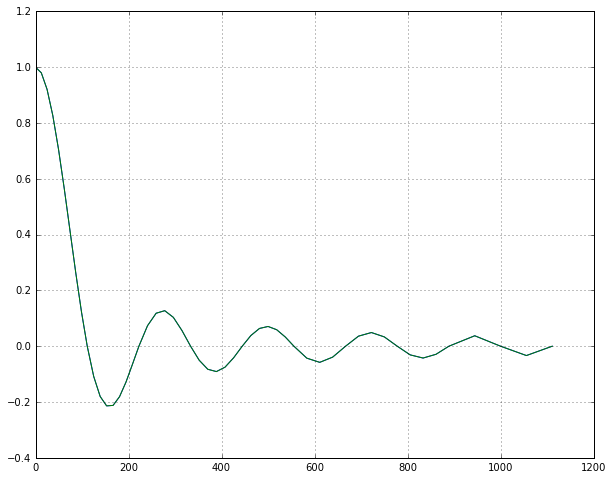

In [23]:
plt.plot(CCD.mtf['spf'], CCD.mtf)
plt.grid()

In [24]:
# Check at reference temerapture of 40 deg C
CCD.temperature = [40.0, 'degC']
print CCD.darkcurrent, ' at CCD ', CCD.temperature

Pixel Dark Current : 3846.0 e/s  at CCD  Temperature : 40.0 degC


In [25]:
# Try a low temperature and then back to starting temeprature
CCD.temperature = [-10.0, 'degC']
print CCD.darkcurrent, ' at CCD ', CCD.temperature
CCD.temperature = [25.0, 'degC']
print CCD.darkcurrent, ' at CCD ', CCD.temperature

Pixel Dark Current : 27.2141657247 e/s  at CCD  Temperature : -10.0 degC
Pixel Dark Current : 870.85330319 e/s  at CCD  Temperature : 25.0 degC


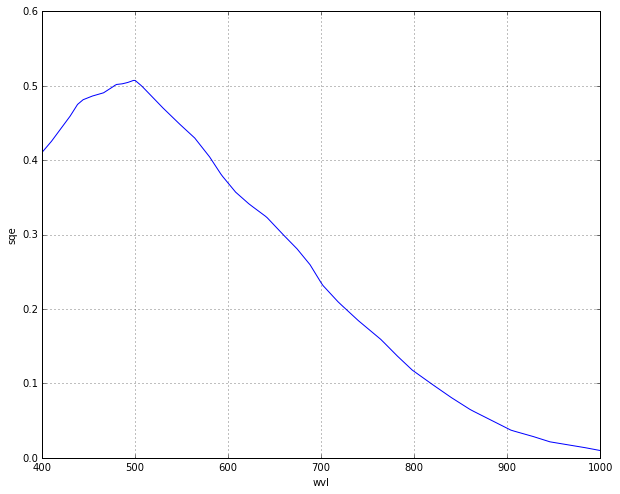

In [26]:
# Notice that wavelength units are converted to nm, the preferred unit in MORTICIA
CCD.sqe.plot()
plt.grid()

In [27]:
# Build an SQE DataArray for the colour version of the KAI11002
# Read SQE data for the red, green and blue channels of the sensor
Red = np.genfromtxt('./data/fpa/KodakKAI11002_SQE_Red.csv', delimiter=',')
xdRed = xr.DataArray(Red[:,1], [('wvl', Red[:,0], {'units': 'nm'})], name='sqe', attrs={'units': ''})
Grn = np.genfromtxt('./data/fpa/KodakKAI11002_SQE_Green.csv', delimiter=',')
xdGrn = xr.DataArray(Grn[:,1], [('wvl', Grn[:,0], {'units': 'nm'})], name='sqe', attrs={'units': ''})
Blu = np.genfromtxt('./data/fpa/KodakKAI11002_SQE_Blue.csv', delimiter=',')
xdBlu = xr.DataArray(Blu[:,1], [('wvl', Blu[:,0], {'units': 'nm'})], name='sqe', attrs={'units': ''})


<xarray.DataArray 'sqe' (wvl: 44)>
array([ 0.00805369,  0.00748073,  0.00900044,  0.00709275,  0.00871089,
        0.01487045,  0.01094696,  0.00230374,  0.00156529,  0.00156529,
        0.00156287,  0.00237258,  0.01884566,  0.02621858,  0.03256837,
        0.06150092,  0.08485921,  0.22975055,  0.3178368 ,  0.33267482,
        0.32095753,  0.30105061,  0.28284412,  0.25853758,  0.24548863,
        0.23255158,  0.21492229,  0.20272098,  0.19250727,  0.16972472,
        0.16626108,  0.1457333 ,  0.12122833,  0.11019661,  0.09601202,
        0.09748505,  0.08290392,  0.06369738,  0.05710799,  0.04612569,
        0.03660769,  0.02489323,  0.01537523,  0.009518  ])
Coordinates:
  * wvl      (wvl) float64 399.8 424.0 436.0 448.0 460.0 472.0 484.0 496.0 ...
Attributes:
    units: 

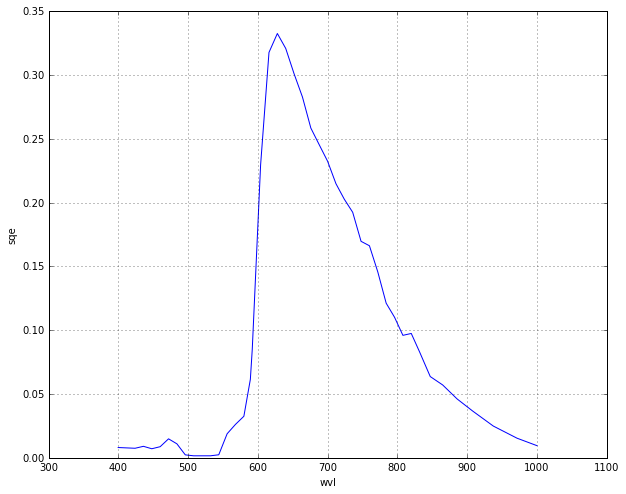

In [28]:
xdRed.plot()
plt.grid()
xdRed

In [29]:
# Put all three onto a common wavelength axis
import morticia.tools.xd as xd

In [30]:
xdRed, xdGrn, xdBlu = xd.xd_harmonise_interp((xdRed, xdGrn, xdBlu))
# Shelve these for later use

<xarray.DataArray 'sqe' (wvl: 70)>
array([ 0.00805369,  0.00804878,  0.00776476,  0.00748073,  0.00900044,
        0.00709275,  0.00871089,  0.01143523,  0.01487045,  0.01094696,
        0.00708827,  0.00230374,  0.0020746 ,  0.00156529,  0.00156529,
        0.00156287,  0.00193107,  0.00237258,  0.01884566,  0.02146465,
        0.02621858,  0.03256837,  0.06150092,  0.08485921,  0.22975055,
        0.3178368 ,  0.33267482,  0.32095753,  0.30105061,  0.28284412,
        0.25853758,  0.24548863,  0.23255158,  0.21492229,  0.20272098,
        0.19250727,  0.16972472,  0.16766138,  0.16626108,  0.1457333 ,
        0.12122833,  0.11019661,  0.09601202,  0.09748505,  0.08290392,
        0.06774196,  0.06369738,  0.06044559,  0.05710799,  0.05553533,
        0.04917877,  0.04612569,  0.04418683,  0.04347475,  0.03837381,
        0.03660769,  0.03348603,  0.03281286,  0.02871115,  0.02489323,
        0.02422   ,  0.02245569,  0.02086085,  0.01750169,  0.01537523,
        0.01461124,  0.014473

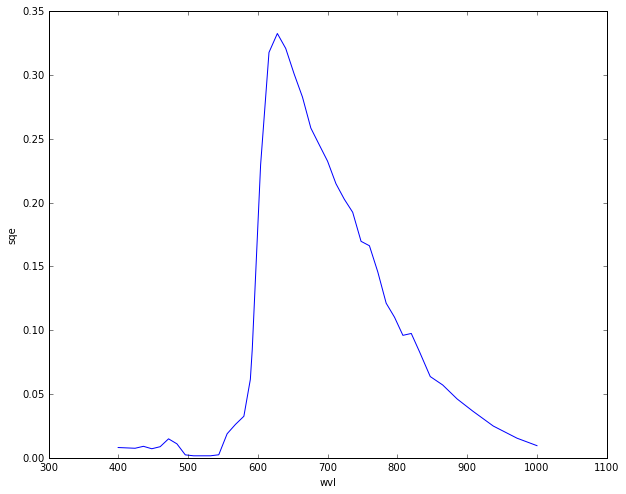

In [31]:
xdRed.plot()
xdRed

In [32]:
# Compile the three colour SQE response curves
KodakKA11002ColorSQE = xr.DataArray([xdBlu, xdGrn, xdRed],[('chn', [0, 1, 2], {'labels': ['Blue', 'Green', 'Red']}), 
                                            ('wvl', xdRed['wvl'], {'units': 'nm'})],
                     name='sqe', attrs={'units': ''})

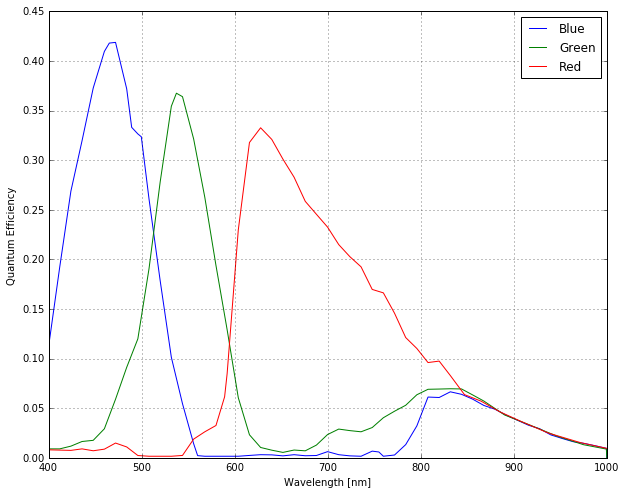

In [33]:
# Can also plot all three channels as follows
plt.plot(KodakKA11002ColorSQE['wvl'], KodakKA11002ColorSQE.T)
plt.xlim([400.0, 1000.0])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency')
plt.legend(KodakKA11002ColorSQE['chn'].labels)
plt.grid()

In [34]:
# Can also harmonise colour and monochrome responses
a,b = xd.xd_harmonise_interp((KodakKA11002ColorSQE, KodakKA11002_SQE))

In [35]:
# Now create a camera based on the KodakKAI11002 color chip
# Use the Atik 11000 Colour camera as an example - it has 16-bit digitisation
KodakKA11002Color = electro.FocalPlaneArray(pitch=[9.0, 9.0, 'um'], aperture=[9.0, 'um'], 
                              pixels=[4008, 2672], wellcapacity=[60000.0, 'e'], 
                              readnoise=[32.0, 'e'], darkcurrent=[3846.0, 'e/s'], dsnu=[3.0, '%'], prnu=[2.0, '%'],
                              sqe=KodakKA11002_SQE, darkcurrent_delta_t=[7.0, 'delta_degC'], t_ref=[40.0, 'degC'],
                              temperature=[-30.0, 'degC'])  # Set operating temperature to -30 deg C
Atik11000 = electro.Camera(fpa=KodakKA11002Color, ad_bit_depth=[16, 'bit'])


D:\Projects\GitHub\MORTICIA\morticia\sensor\electro.py:309: UserWarning: Estimating Camera digital gain from bit depth and FPA well capacity
  warnings.warn('Estimating Camera digital gain from bit depth and FPA well capacity')


In [36]:
Atik11000.fpa.temperature = [-30, 'degC']
print Atik11000.fpa.darkcurrent

Pixel Dark Current : 3.755859375 e/s
